In [1]:
# in multiple linear regression there are multiple features(independent variable)
# but single label

In [2]:
# formula -:
# y =m1*x1+ m2*x2+m3*x3+........mn*xn+c 

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_excel('D:/machine_learning/csv_files/multivariate_data.xlsx')

In [5]:
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [6]:
# Temperature (T) in the range 1.81°C and 37.11°C,
# Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
# Relative Humidity (RH) in the range 25.56% to 100.16%
# Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
# Net hourly electrical energy output (EP) 420.26-495.76 MW

In [7]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [8]:
X

array([[  14.96,   41.76, 1024.07,   73.17],
       [  25.18,   62.96, 1020.04,   59.08],
       [   5.11,   39.4 , 1012.16,   92.14],
       ...,
       [  31.32,   74.33, 1012.92,   36.48],
       [  24.48,   69.45, 1013.86,   62.39],
       [  21.6 ,   62.52, 1017.23,   67.87]])

In [9]:
y

array([463.26, 444.37, 488.56, ..., 429.57, 435.74, 453.28])

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test  = train_test_split(X, y, test_size=0.33, random_state=0)


In [11]:
X_train

array([[  26.44,   71.64, 1004.55,   85.53],
       [  27.4 ,   69.13, 1001.4 ,   82.47],
       [  26.36,   73.68, 1013.99,   86.44],
       ...,
       [  16.81,   38.52, 1018.26,   75.21],
       [  12.8 ,   41.16, 1022.43,   86.19],
       [  32.32,   67.9 , 1006.08,   37.93]])

In [12]:
y_test

array([431.23, 460.01, 461.14, ..., 435.86, 455.63, 439.03])

In [13]:
from sklearn.linear_model import LinearRegression 
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred = reg.predict(X_test)
y_pred

array([431.39746929, 458.61306823, 462.8132933 , ..., 430.24576539,
       464.47083536, 444.08498274])

In [15]:
reg.predict([[14.96,41.76,1024.07,73.17]])

array([467.36527472])

In [16]:
ndf = pd.DataFrame(X_test, columns=['AT','V','AP','RH'])
ndf

,AT,V,AP,RH
0,28.66,77.95,1009.56,69.07
1,17.48,49.39,1021.51,84.53
2,14.86,43.14,1019.21,99.14
3,22.46,58.33,1013.21,68.68
4,18.38,55.28,1020.22,68.33
...,...,...,...,...
3153,31.77,76.09,1007.40,73.36
3154,6.61,38.68,1017.50,63.88
3155,28.87,71.97,1008.74,82.61
3156,15.12,41.79,1007.16,82.35


In [17]:
ndf2 = pd.DataFrame({'actuals':y_test,'predicted':y_pred})
ndf2

,actuals,predicted
0,431.23,431.397469
1,460.01,458.613068
2,461.14,462.813293
3,445.90,448.618875
4,451.29,457.886495
...,...,...
3153,431.69,424.924806
3154,483.88,485.522503
3155,435.86,430.245765
3156,455.63,464.470835


In [24]:
reg.coef_

array([-1.96245968, -0.24206884,  0.06666908, -0.1574956 ])

In [25]:
reg.intercept_

450.08261282120156

In [18]:
# Check the Accuracey using r2_Score

In [19]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9310173107097915

In [20]:
from sklearn import metrics

In [21]:
print("Mean absolute error is:",metrics.mean_absolute_error(y_test, y_pred))
print("Mean sqared error:",metrics.mean_squared_error(y_test, y_pred))
print("Root mean squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean absolute error is: 3.5783052440171126
Mean sqared error: 20.114356686448268
Root mean squared Error: 4.484903196998601


In [22]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


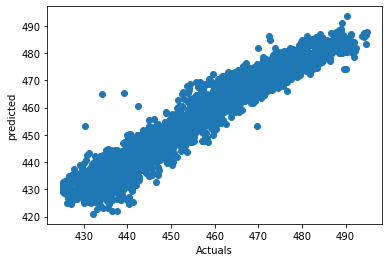

In [23]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actuals')
plt.ylabel('predicted')
plt.show()
